## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib notebook

## Load the Processed Data and Select Feauture of the Model

if we accidentally shuffle any of the data, we need to add index_col
this will intruct and ensure the first colunm of the csv is used as row index.

First row shd not be read as header hence, header =none

In [2]:
loan_data_inputs_train= pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_targets_train= pd.read_csv('loan_data_targets_train.csv',index_col=0,header= None)
loan_data_inputs_test= pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test= pd.read_csv('loan_data_targets_test.csv',index_col=0, header=None)

### Initial Data Exploration

In [3]:
pd.options.display.max_rows= None # since we wil have lots of out all row must show

#### Train Input and Train Target = Rows must be equal

In [4]:
loan_data_inputs_train.head(1)

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.9,762.08,A,...,1,0,0,1,0,0,0,0,0,0


In [5]:
loan_data_inputs_train.shape 
#loan_data_inputs_train.shape # (373028,324)

(373028, 324)

In [6]:
loan_data_targets_train.shape
#loan_data_targets_train.shape #(372038,1)

(373028, 1)

#### Test Input and Test Target = Rows must be equal

In [7]:
loan_data_inputs_test.shape
#loan_data_inputs_test.shape #(93257,324)

(93257, 324)

In [8]:
loan_data_targets_test.shape
loan_data_targets_test.shape #(93257,1)

(93257, 1)

### Selecting Features of the Model

select independent variables for the model from the variables that were created
out of the dummies and recorded in excel.


In [9]:
#only independent variables

In [10]:
list(loan_data_inputs_train.columns.values) 

['Unnamed: 0.1',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll

In [11]:
loan_data_inputs_train.isnull().sum()

Unnamed: 0.1                                                            0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           22076
emp_length                                                          16808
home_ownership                        

In [12]:
pd.options.display.max_rows= 200 # since we wil have lots of out all row must show

In [13]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [14]:
# Here we select a limited set of input variables we need for the mode
#creation
# we need to create a new dataframe for that
#we take all row from the loan data iput, and pick the selected colums

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [15]:
inputs_train_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
inputs_train_with_ref_cat.shape

(373028, 126)

In [17]:
#list(inputs_train_with_ref_cat.columns.values) 

we must remove one dummy for each original varialble, if not we will have
dummy variable trap.

For the PD mode, the dummy variable to be removed is the ones we determined as reference category.

we create a list called reference categories. The reference or benchmark
are the dummies we do not include in the training process. 
If all dummies are (0) zeros, then the romoved dummies shd be 1

In [18]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

Then we can proceed andselect only the relevant dummies for our PD MODEL,

i.e. all the dummies - reference categories

In [19]:
# input train will be our independent variables for the model (x)

inputs_train= inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [20]:
#list(inputs_train.columns.values) 


In [21]:
inputs_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:OWN                     0
home_ownership:MORTGAGE                0
addr_state:NM_VA                       0
addr_state:NY                          0
addr_state:OK_TN_MO_LA_MD_NC           0
addr_state:CA                          0
addr_state:UT_KY_AZ_NJ                 0
addr_state:AR_MI_PA_OH_MN              0
addr_state:RI_MA_DE_SD_IN              0
addr_state:GA_WA_OR                    0
addr_state:WI_MT                       0
addr_state:TX                          0
addr_state:IL_CT                       0
addr_state:KS_SC_CO_VT_AK_MS           0
addr_state:WV_NH_WY_DC_ME_ID           0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:credit_card                    0
purpose:debt_con

In [22]:
inputs_train.describe().T

,count,mean,std,min,25%,50%,75%,max
grade:A,373028.0,0.160200,0.366792,0.0,0.0,0.0,0.0,1.0
grade:B,373028.0,0.294160,0.455665,0.0,0.0,0.0,1.0,1.0
grade:C,373028.0,0.268733,0.443301,0.0,0.0,0.0,1.0,1.0
grade:D,373028.0,0.164862,0.371056,0.0,0.0,0.0,0.0,1.0
grade:E,373028.0,0.076702,0.266118,0.0,0.0,0.0,0.0,1.0
grade:F,373028.0,0.028228,0.165625,0.0,0.0,0.0,0.0,1.0
home_ownership:OWN,373028.0,0.089256,0.285113,0.0,0.0,0.0,0.0,1.0
home_ownership:MORTGAGE,373028.0,0.506546,0.499958,0.0,0.0,1.0,1.0,1.0
addr_state:NM_VA,373028.0,0.036032,0.186370,0.0,0.0,0.0,0.0,1.0
addr_state:NY,373028.0,0.086350,0.280881,0.0,0.0,0.0,0.0,1.0


In [23]:
#the above have the inputs needed for the model estimation

# PD MODEL ESTIMATIONOR FITTING

## Building Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [25]:
# 1st is to create classification object
#is an instance of a logistic regression class

reg=LogisticRegression() 


In [26]:
# since we wil have lots of out all row must show
pd.options.display.max_rows= None 

In [27]:
# to estimate our model we will fit all the inputs and the target
# WE RUN the fit function to fit logistic regression
# based on our reg class above
#to estimate our model we will fit all the inputs and the target
#input train has all the dummies /independent variables
#target train has the bad_good, dependent variable

In [28]:
#  2nd step is to fit the model with input train and target train
reg.fit(inputs_train, loan_data_targets_train) 


C:\Users\kwaku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kwaku\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#for the Intercept: (Bo)
reg.intercept_

array([-1.63571939])

In [30]:
#for the coeficients (B1...Bm)
reg.coef_

array([[ 1.12586255e+00,  8.84886298e-01,  6.89331793e-01,
         5.00422857e-01,  3.22965623e-01,  1.34027780e-01,
         9.16952286e-02,  1.06807139e-01,  3.66707426e-02,
         5.92919393e-02,  5.95141402e-02,  6.28556433e-02,
         7.86325178e-02,  1.36362387e-01,  1.00387306e-01,
         1.85015296e-01,  2.40266627e-01,  2.24545186e-01,
         2.63177389e-01,  3.20838874e-01,  5.21797062e-01,
         8.67139455e-02, -1.09055508e-02,  3.04682987e-01,
         2.01120878e-01,  2.14347744e-01,  2.67454293e-01,
         5.39951532e-02,  7.96124777e-02,  9.99056371e-02,
         1.25474919e-01,  9.04639136e-02,  6.00857209e-02,
         1.22874912e-01,  1.08192506e+00,  8.81683345e-01,
         7.81169233e-01,  5.79634140e-01,  4.17392675e-01,
         1.71595926e-01, -6.45528369e-02,  8.73426612e-01,
         5.49491110e-01,  2.99513709e-01,  1.09051679e-01,
         2.59672261e-02,  4.83421981e-02,  5.60498203e-02,
         1.21747895e-01,  1.23367513e-01,  8.45999727e-0

### Formatting & Extracting The Model Results into Table

In [31]:
#now that we have the model coefficients and intercept we 
# want to get the variable names as well.So will have three column
#table called feature name
feature_name = inputs_train.columns.values




Then we create a summary table datafram to place it in

In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable create
# above from the input data.

summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values of the transposed coefficients from the 'LogisticRegression' object.

#Then we have to create a row on top for the intercept
# we begin with adding on row to all the existing row
summary_table.index = summary_table.index + 1
# Increases the rows by one down

## we fill the first row (0) with feature name:Intercept
## and the actual intercept number
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.

#we arrange the table by its index so that row (0) is up
#Sorts the dataframe by index.
summary_table=summary_table.sort_index()


summary_table

,Feature name,Coefficients
0,Intercept,-1.635719
1,grade:A,1.125863
2,grade:B,0.884886
3,grade:C,0.689332
4,grade:D,0.500423
5,grade:E,0.322966
6,grade:F,0.134028
7,home_ownership:OWN,0.091695
8,home_ownership:MORTGAGE,0.106807
9,addr_state:NM_VA,0.036671


## Evaluating Logistic Model with P Values

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [34]:
inputs_train.head(3)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [35]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [36]:
## Checking for Correlation

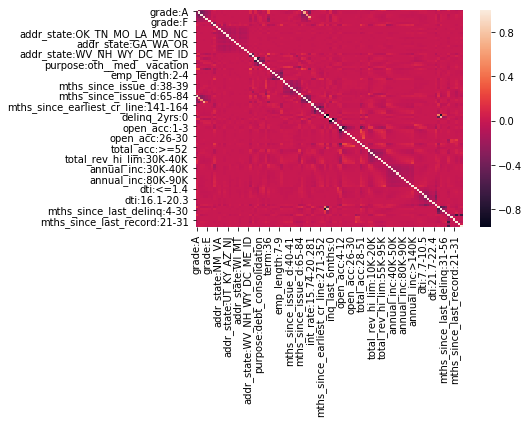

In [37]:
#Generating the correlation heat-map
corr = inputs_train.corr()
sns.heatmap(corr)

In [38]:
#Next, we compare the correlation between features and remove one of
#two features that have a correlation higher than 0.9 and less that -0.9

#columns = np.full((corr.shape[0],), True, dtype=bool)
#for i in range(corr.shape[0]):
 #   for j in range(i+1, corr.shape[0]):
  #      if corr.iloc[i,j] >= 0.9:
  #          if corr.iloc[i,j] <= -0.9:
   #             if columns[j]:
    #                columns[j] = False
     #               selected_columns = inputs_train.columns[columns]
      #              inputs_train = inputs_train[selected_columns]

In [39]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [40]:
#from scipy import signal
#from scipy.signal import filter_design as fd
#import matplotlib.pylab as plt

In [41]:
#in order to access which independent variables contributes to
#better predictions of borrowers default and which do not
#we need to check the statistical significance of each dummy variable using
#P value.P Value of 0.05 or less means significant
#Built in method for P value in Sklearn are univariate, i.e.
#it takes account of each feature on the outcome as if there were no other variables to it
#featurs or variables.But in logistic regression, the impact of the 
#features or variables (dummy) on an outcome is collective but not individual
#hence using it make the model flawed.
#currently there is not  built in way for this (multivariate p values) 
# in logistic regression model in sklearn so we will use this below
#by altering the fit methods in th regression model

In [42]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [43]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

#This gives us a multivalue (combine all dummies) p value
#P values for sklearn logistic regression. 
#it is based on advanced linear algebraic operations, beyond 

#Class to display p-values for logistic regression in sklearn.


#1st is to create classification object
#is an instance of a logistic regression class

from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class LogisticRegression_with_p_values: # this is a new class of reg
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)
        ## this inherets everything from the original logistic regression built about

    ##code below is a fit function that overight the existing fit 
    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values  # p values are store in a variable called p value

In [44]:
reg = LogisticRegression_with_p_values()

# over write the exiting reg funvtion
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [45]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

In [46]:
# Same as above to overwrite the fit table for display
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.635719
1,grade:A,1.125863
2,grade:B,0.884886
3,grade:C,0.689332
4,grade:D,0.500423
5,grade:E,0.322966
6,grade:F,0.134028
7,home_ownership:OWN,0.091695
8,home_ownership:MORTGAGE,0.106807
9,addr_state:NM_VA,0.036671


In [47]:
# This is a list. We need to aextract the P values of the Model
# and add to to the table
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [48]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# we make the list of P vale to incles nan for the intercept so it will match
# We add the value 'NaN' in the beginning of the variable with p-values.

In [49]:
p_values

array([            nan, 2.92937026e-035, 1.85746184e-047, 5.34244958e-034,
       1.51138557e-020, 2.00164420e-011, 7.59688110e-003, 5.51922803e-006,
       4.09997101e-017, 2.52833498e-001, 1.46521931e-002, 1.03441223e-002,
       3.09062262e-003, 1.62949249e-003, 1.55730017e-009, 7.80464105e-004,
       4.35581933e-012, 4.47007193e-007, 6.23041830e-018, 2.40136567e-019,
       2.72518874e-025, 1.12390481e-022, 3.64947189e-009, 4.18332402e-001,
       9.08010119e-027, 1.51626421e-014, 6.81374062e-012, 1.52019043e-017,
       3.54700966e-005, 1.98885354e-008, 1.18642411e-004, 3.05408336e-011,
       2.39308107e-005, 3.88332354e-003, 2.67677136e-011, 3.60413035e-174,
       3.33603746e-144, 3.23971799e-119, 8.77653371e-084, 3.48332155e-039,
       1.07413949e-008, 2.70128660e-002, 2.35450667e-030, 1.96990253e-034,
       5.18311375e-016, 1.81682311e-004, 4.42203960e-001, 1.03149912e-001,
       9.56092049e-002, 1.27509946e-004, 2.44520523e-004, 1.36197086e-001,
       3.72522510e-001, 2

In [50]:
#create additional colunm on the summary table
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [51]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.635719,NaN
1,grade:A,1.125863,2.929370e-35
2,grade:B,0.884886,1.857462e-47
3,grade:C,0.689332,5.342450e-34
4,grade:D,0.500423,1.511386e-20
5,grade:E,0.322966,2.001644e-11
6,grade:F,0.134028,7.596881e-03
7,home_ownership:OWN,0.091695,5.519228e-06
8,home_ownership:MORTGAGE,0.106807,4.099971e-17
9,addr_state:NM_VA,0.036671,2.528335e-01


Analysis of P Value ofthe  Independent Variables:

This analysis is easy with excel

    1. Select variables that coeffiecents are statistically significant
    2. Note that each variable is represented by several dummies hecne
    3 if coeffiecient of them all are not significant, we have to remove
    4. but if some are significant and others are not, we should not remove.. we dont want to loose data
    5. conventioanlly if p value is less that 0.05(5%) it is statistically significant
    
    

In [52]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables

#to pick only statistically significant variables
#from the loan train data we pick only the variables we need, using
# all rows

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [53]:
# these are the categories we have remove the non stat sign frn
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [54]:
#to pick only statistically significant variables
## we pick the formala above and drop the categories we have also droped
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [55]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [56]:
feature_name = inputs_train.columns.values

In [57]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.344611
1,grade:A,1.126682
2,grade:B,0.885124
3,grade:C,0.690176
4,grade:D,0.501893
5,grade:E,0.325050
6,grade:F,0.136361
7,home_ownership:OWN,0.093764
8,home_ownership:MORTGAGE,0.106042
9,addr_state:NM_VA,0.037102


In [58]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.344611,NaN
1,grade:A,1.126682,2.055520e-35
2,grade:B,0.885124,7.691698e-48
3,grade:C,0.690176,1.794308e-34
4,grade:D,0.501893,5.134331e-21
5,grade:E,0.325050,5.853690e-12
6,grade:F,0.136361,5.456077e-03
7,home_ownership:OWN,0.093764,3.240298e-06
8,home_ownership:MORTGAGE,0.106042,4.995570e-17
9,addr_state:NM_VA,0.037102,2.466668e-01


Interpretation of the Model

Coefficients: exponential of the coeffienct shows the change in the odds for and event occuring (i.e. default or no default) between an observation with 0 (default) or 1 (no default)

Higer Coefficients value in logistic regression means that lower odds of defautls ( that lowe PD of default).

Comparisons: the model is coefficents are compared to the categorical variables that were left out of the model. Categorical variables have coefficient of 0.

Eg. Grade G = categorical. We have A to F, where A is best.
   what is the odd for Grade D = 0.5012 and to be tetter than Grade G:
   EXP(0.5012) =1.65. Hence grade D is 1.65x better/greater than G
    


In [59]:
import pickle

In [60]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In assesing the performance of the model, recall that we use the test d
data set


Just as with the train data, we need to select the relevant colunmn or variables


In [61]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [62]:
## we repeat the same dummy variables as reference categores used for the model - 2
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.


In [63]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [64]:
## preseriving only the variables needed for the model testing

inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

# this should give us the same 84 variables that were used for training

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


## Model PD for the Test Data

In [65]:
y_hat_test=reg2.model.predict(inputs_test)

# use the input test data to predict PD based ont he final model 
# of the training data.
# the probabilities will be categorized based on a cut -off to be picked
#Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [66]:
## setting the Cut of. (default is 0.5) but mostley it is based 
## on the bank risk tolerance

#So any PD >=50% is classified as good (1), and below is bad(0)

## so y_hat_test wil be an arrays of ones and zeros

In [67]:
y_hat_test

# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

To fully access the model  Valilidaty, it is important to 
first obtain the RAW PD Predictions of the TEST DATA SET 
Hence we use the method below:


In [68]:
y_hat_test_proba=reg2.model.predict_proba(inputs_test)

# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [69]:
y_hat_test_proba

# this gives us two sets of elements in an array of numbers per the data set. 
# the numbers are the PD for bad borrows, and 1-PD for good borrowers
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.07553598, 0.92446402],
       [0.15422897, 0.84577103],
       [0.1143125 , 0.8856875 ],
       ...,
       [0.02584972, 0.97415028],
       [0.04050311, 0.95949689],
       [0.04758531, 0.95241469]])

In [70]:
### We create a new array where each element is equal 
# to the second of each of the array

In [71]:
y_hat_test_proba[:][:,1]

# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([0.92446402, 0.84577103, 0.8856875 , ..., 0.97415028, 0.95949689,
       0.95241469])

In [72]:
### we code to select only the second coloum of the 
# array, ie, good borrowers

In [73]:
y_hat_test_proba=y_hat_test_proba[:][:,1]

# We store these probabilities in a variable.

In [74]:
y_hat_test_proba # only contains good borrowers

array([0.92446402, 0.84577103, 0.8856875 , ..., 0.97415028, 0.95949689,
       0.95241469])

In [75]:
##### For convenience we need to put the ACTUAL: good_bad variables and
#### the PREDICTION variables into a one data frame

In [76]:
loan_data_targets_test_temp=loan_data_targets_test

In [77]:
loan_data_targets_test_temp.head()

,1
0,
362514,1
288564,1
213591,1
263083,1
165001,1


In [78]:
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

# resets index
# We reset the index of a dataframe.

In [79]:
loan_data_targets_test_temp.head()

,1
0,1
1,1
2,1
3,1
4,1


In [80]:
# Concatenates two dataframes.
##creating a data frame that will contain the test and the predictions
df_actual_predicted_probs=pd.concat([loan_data_targets_test_temp,
                                   pd.DataFrame(y_hat_test_proba)],axis=1)

In [81]:
df_actual_predicted_probs.shape # shd have two colunms

(93257, 2)

In [82]:
df_actual_predicted_probs.head() # shd have two colunms

,1,0
0,1,0.924464
1,1,0.845771
2,1,0.885688
3,1,0.940186
4,1,0.968333


In [83]:
#rename the colums
df_actual_predicted_probs.columns=['loan_data_targets_test','y_hat_test_proba' ]

In [84]:
df_actual_predicted_probs.head() # shd have two colunms

,loan_data_targets_test,y_hat_test_proba
0,1,0.924464
1,1,0.845771
2,1,0.885688
3,1,0.940186
4,1,0.968333


In [85]:
# index this dataframe to be like the loan data input test
# and loan data target test
# Makes the index of one dataframe equal to the index of another dataframe.

df_actual_predicted_probs.index=loan_data_inputs_test.index

In [86]:
df_actual_predicted_probs.tail(10)

,loan_data_targets_test,y_hat_test_proba
63372,1,0.912892
190559,1,0.875466
254758,1,0.927923
436344,1,0.875597
231767,1,0.977373
115,1,0.875995
296284,1,0.966099
61777,0,0.974150
91763,1,0.959497
167512,1,0.952415


## TESTING MODEL ACCURACY

#### ACCURACY RATIO & AREA UNDER THE CURVE (ROC)

How accurate a model is, is based on the extend to which 

it correctly classify the good borrowers and the bad borrowers

(i.e. the estimated good or bad ) based on cut-off we will choose.

Went a cut off is chosen, all PDs be;ow it are classified as bad and PDs above it are classified as good

In [87]:

#cut off treshold 
tr= 0.9

#creat a new colunm in the df_actual_predicted_probs with an indicator
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.

#dataframe and classify it based on 0/1 condition

df_actual_predicted_probs['y_hat_test']= np.where(df_actual_predicted_probs['y_hat_test_proba']>tr, 1,0)

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924464,1
288564,1,0.845771,0
213591,1,0.885688,0
263083,1,0.940186,1
165001,1,0.968333,1


In [88]:
#Then Build you Confusion Matrix

In [89]:
# a tab is made btn loan data target and predictor_ytedt
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actuals'],colnames=['Predicted'])

Predicted,0,1
Actuals,,
0,7374,2816
1,35806,47261


From all observations that are good, 83k is predicted to good, 
and 6 is bad. 

Also, 10k is wrongly predicted to be good, but it actually bad (this 20k is a problem for the bank as it will increase losses - false positive)

And 5 were predicted to be bad, when it actually good.

The treshold is not good, cos it will mean that a lot of applicants (10.9%) will be given loans when indeed they are bad. Hence we reset the
treshold to 0.9 and re-run the code

In [90]:
#Model accuracy: total number of correctly predicted observations 
# divided by total number of observations which gives us percentages
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames=['Actuals'],colnames=['Predicted'])/ df_actual_predicted_probs.shape[0]

Predicted,0,1
Actuals,,
0,0.079072,0.030196
1,0.383950,0.506782


In [91]:
# This calcualted the Accuracy of the model, which is the sum of the diagonal rates.

In [92]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5858541449971584

#In doing Credit Risk, the focus is to reduce default but not lose business

#hence overall accuracy of Confusion Matrix is not a good or ultimate
measure for PD Model.

The rate of True Positive ( i.e. goods that are predicted as Good) and False Positives (bads that are incorrectly predicted as good) are far more 
important than the overall accuracy of the model hence we rely on ROC Curve

## Ploting ROC

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924464,1
288564,1,0.845771,0
213591,1,0.885688,0
263083,1,0.940186,1
165001,1,0.968333,1


In [95]:
# to start the ROC curve: for the predicted table.
# it takes two args. loan test data, the y hat PD, 
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.

# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

## ROC gives us three arrays
#first is the False Positive Rate
# True Positive Rate
# the Thresholds
# so for each threshold, we know the FP and TP rates

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.32423225e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99261777, 0.99261777, 0.9906507 , ..., 0.40919151, 0.38715237,
        0.38486955]))

In [96]:
### extracting the ROC arrays for easier manipulation
## fpr = false positive rate, tpr: true positive rate, and thressholds

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [97]:
## To Plot the ROC CURVE

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

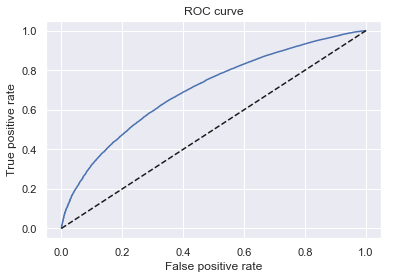

In [99]:
plt.plot(fpr, tpr) # this plot the ROC curve with fpr on x-axis and tpr:y axis
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [100]:
# We need to Analyze the ROC Curve with some Benchmarks 
# so we can know if our model is good.

# We compare the straight line ( which is the random prediction) and the 
# blue curve (TPR vrs FPR comibination based on cut off.)

# Since the Curve lies above the 45degree random prediction line, it means, it 
# performs better. However, more analysis is needed, ie. AUC

# To understand, it we use AUC.. the area under the ROC curve. It is a good
# measure of how good the ROC is. AUC under the prediction by chance line is 50%






### AUC Under ROC Curve Evaluation

In [101]:
AUROC=roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                    df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7020564698279135

The higher the AUC the better the Model

AUC Value:
50 -60% : Model is Bad

60 - 70% : Model is Poor

70% - 80% : Model is Fair

80% - 90%  : Model is good

90% - 100% : Excellent

  However, to make final conclusing, the building of the model should be more than one from different sources so you can compare AUC values


### Evaluating Performance: GINI AND KOLMOGOROV-SMIRNOV

### Gini Coefficients

Gine Coefficients: it measures inequality between good borrowers and defaulters. 

Is a curve of ploting Cumulative % of Default ( on y-axis) and Cummulate of all loans (default/bad)  of the x -axis.

Pre-reguisite of Gini:

1. The borrowers must be an assending order by estimated probability of being good from the pd model.

Gini Coeff is the percentage of the area above the secondary diagonal line . The greater the area the better the area



In [102]:
# we need to oder our dataframe that contains the targets and the PDs,
# in asscending order

df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [103]:
# check the data to see if PDs predicted are in ascending order
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.384870,0
39810,0,0.387152,0
42344,1,0.409192,0
40518,0,0.439574,0
40173,0,0.459861,0


In [104]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991230,1
231463,1,0.991271,1
239228,1,0.991956,1
261086,1,0.992020,1
242624,1,0.992618,1


In [105]:
# to calculate Cummulative %es  for default and all loans:
# reindex the data frame
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [106]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.384870,0
1,39810,0,0.387152,0
2,42344,1,0.409192,0
3,40518,0,0.439574,0
4,40173,0,0.459861,0


To make the GINI plot we need to cal

1. commulative % of total pop or obs

2. commulative % of good borrowers

3. commulative % of bad borrowers



 

In [107]:
df_actual_predicted_probs['Cumulative N Population']= df_actual_predicted_probs.index + 1


In [108]:
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
#since loan data target test contains 0 & 1, then it is expresed as sum of all rows buy cum sum

In [109]:
df_actual_predicted_probs['Cumulative N Bad']=df_actual_predicted_probs['Cumulative N Population']- df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [110]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.384870,0,1,1,0
1,39810,0,0.387152,0,2,1,1
2,42344,1,0.409192,0,3,2,1
3,40518,0,0.439574,0,4,2,2
4,40173,0,0.459861,0,5,2,3


In [111]:
# finding the Comm Proportion


df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [112]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.384870,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.387152,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.409192,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.439574,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.459861,0,5,2,3,0.000054,0.000024,0.000294


### Plotting Gini & KS

Text(0.5, 1.0, 'Gini')

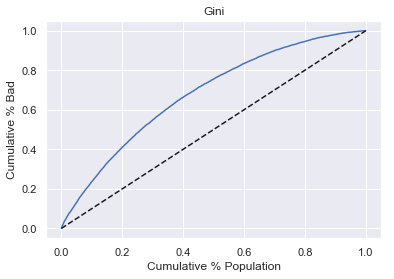

In [113]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

### Calc GINI COEFF: 
GINI = AUROC * 2-1

AUROC = (Gini + 1)/2

In [114]:
Gini =AUROC * 2 - 1
Gini


0.40411293965582695

Gin curve resembles AUCROC a lot. there is a rls between the two,

Gini Coeff is the percentage of the area above the secondary diagonal line . The greater the area the better the area

### KOLMOGOROV-SMIRNOV

This shows how much the model separates good borrows from bad borrower 

this is measured by looking at the cummulative distributions of actual good

borrowers and actual bad borrowers with respect to the estimated PD of 

being good or bad.

KS: is the max difference between t he cummulative distribution functions of "good" and "bad" borrowers with respect to predicted probabilities.

The greater the distance, the better the model


In [115]:
# If Model is Perfect: it will estimate the propabilities of good/bad distributions to 
# be as far from the other as possible then KS will be equal to 1
#However if model is predictive by chance KS : 0,I.E. NO distance
    

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

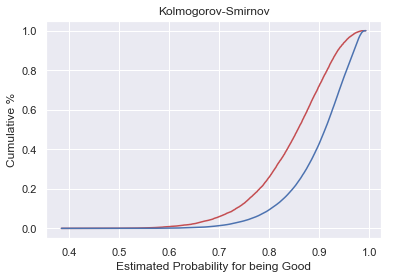

In [116]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

KS criteria is distance between red and blue

In [117]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] -df_actual_predicted_probs['Cumulative Perc Good'])

KS

0.2968383455978694

Mean the two function (bad and good) distributions are sufficiently far 

from each other and hence has satisfactory predictive power

# APPLYING PD MODELS

### Calculating PD of Individual Acounts

In [118]:

pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [119]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [120]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.344611,NaN
1,grade:A,1.126682,2.055520e-35
2,grade:B,0.885124,7.691698e-48
3,grade:C,0.690176,1.794308e-34
4,grade:D,0.501893,5.134331e-21
5,grade:E,0.325050,5.853690e-12
6,grade:F,0.136361,5.456077e-03
7,home_ownership:OWN,0.093764,3.240298e-06
8,home_ownership:MORTGAGE,0.106042,4.995570e-17
9,addr_state:NM_VA,0.037102,2.466668e-01


In [121]:
y_hat_test_proba

array([0.92446402, 0.84577103, 0.8856875 , ..., 0.97415028, 0.95949689,
       0.95241469])

# BUILDING SCORECARDS WITH PD MODEL

PD models must be easy to understand and interprete, even by the ordinary mind

hence PD Models needs to be calibrated into simplified versions called
Scorecards 

Appyling a scorecard is just like applying the PD models itself. 

A scorecard tool produces an individual credit worthiness assesment that
directly corresponds toa specific PD. Because the credit score worthiness are 
name as scored cards, its called credit score


#### Procedure to Prepare Data Frame to Build Score Card

In [125]:
# Recall the Summary Table has the Coeff of the PD model we did
# it has coef for all the dummies except the ref. categories
#but since the ref cat were not used in the model, we will need 
#when creating a score card to make it more interpretable as possible
# hence we need to bring them in

summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.344611,NaN
1,grade:A,1.126682,2.055520e-35
2,grade:B,0.885124,7.691698e-48
3,grade:C,0.690176,1.794308e-34
4,grade:D,0.501893,5.134331e-21
5,grade:E,0.325050,5.853690e-12
6,grade:F,0.136361,5.456077e-03
7,home_ownership:OWN,0.093764,3.240298e-06
8,home_ownership:MORTGAGE,0.106042,4.995570e-17
9,addr_state:NM_VA,0.037102,2.466668e-01


In [126]:
#list of our ref cate

ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [127]:
# we creat a datafram for the ref cat and call the columns
# just as the the summary table
df_ref_categories = pd.DataFrame(ref_categories,columns= ['Feature name'])
#df_ref_categories

## add a coef columns but make them all zeros
df_ref_categories['Coefficients']=0
#df_ref_categories

## add a P vale columns but make them all NaN
df_ref_categories['p_values']= np. nan
df_ref_categories




,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [128]:
#### Now the scorecard to be built is going to be stored as 
# a datafram called Df_scorecard.
## it will be a merged betwn the summary tabele and the ref cat table
## based on rows only ....
df_scorecard=pd.concat([summary_table, df_ref_categories])
#df_scorecard


# we need to reset the index so we can adjust the table well
df_scorecard=df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.344611,NaN
1,1,grade:A,1.126682,2.055520e-35
2,2,grade:B,0.885124,7.691698e-48
3,3,grade:C,0.690176,1.794308e-34
4,4,grade:D,0.501893,5.134331e-21
5,5,grade:E,0.325050,5.853690e-12
6,6,grade:F,0.136361,5.456077e-03
7,7,home_ownership:OWN,0.093764,3.240298e-06
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17
9,9,addr_state:NM_VA,0.037102,2.466668e-01


In [129]:
#### We will als need the names of the original independent variables 
## so we create another colunm for that. 
## note the name of the original variable is found in the feature name.
## so anything before the column on the feature name is the original  variable name
#the code below help us to extract it
df_scorecard['Original feature name']=df_scorecard['Feature name'].str.split(':').str[0]

In [134]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.344611,NaN,Intercept
1,1,grade:A,1.126682,2.055520e-35,grade
2,2,grade:B,0.885124,7.691698e-48,grade
3,3,grade:C,0.690176,1.794308e-34,grade
4,4,grade:D,0.501893,5.134331e-21,grade
5,5,grade:E,0.325050,5.853690e-12,grade
6,6,grade:F,0.136361,5.456077e-03,grade
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state


# Building the Actual Score Card

In order to create the scorecard, we need to turn the regression coefficents from the PD model into simple scores

we must decide on what score card we want and what range? 

e.g  like FICO Score

Minimum score =300

Maximum score = 850



In [135]:
## store the variables
min_score =300
max_score=850

In [136]:
## Rescalling the credit worthiness assements (PDs) from our model to 
# the desired score above.
#this is done by fixing the min and max of the PDs assesments to our desired score
# the min credit worthiness is reached when a borrower fall into the worst categories for all variables
# with low coeff
# the max credit worthines is reached when a borrower falls into good (all 1) in all the categories
# variables with highest coeff

In [137]:
#First: Finding the min and max values of each coef for each rows according to our PD model

In [138]:
df_scorecard.head(1)

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.344611,NaN,Intercept


In [139]:
#by applying group by we can find the max and min
# it group by original feature name, and aggregate the coef colunm,and the min 
df_scorecard.groupby('Original feature name')['Coefficients'].min()

# the above will give us the min coef per each original indep. variable.
## you should expect to see them moslty close to 0. the intercept wll be negative 
# cos is one value 

Original feature name
Intercept                     -1.344611
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.074828
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.068098
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011033
Name: Coefficients, dtype: float64

In [140]:
# store this min credit worthy assesements of the coeff

min_sum_coef= df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.4985691353129296

In [141]:
## do same for max
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.344611
acc_now_delinq                 0.218189
addr_state                     0.522494
annual_inc                     0.565421
dti                            0.382112
emp_length                     0.125336
grade                          1.126682
home_ownership                 0.106042
initial_list_status            0.054472
inq_last_6mths                 0.693387
int_rate                       0.883399
mths_since_earliest_cr_line    0.125309
mths_since_issue_d             1.085942
mths_since_last_delinq         0.213464
mths_since_last_record         0.398004
purpose                        0.301352
term                           0.079098
verification_status            0.084732
Name: Coefficients, dtype: float64

In [142]:
max_sum_coef= df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.620823581532542

### Rescalling the Coeff to Scores

To turn each dummy variable coef to a corresponding score we have to follow the formlula below:


Variable_score = variable_coeff *  (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [145]:
# we perform this cal for all the coeff we have from the regression model

df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score)/(max_sum_coef-min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.344611,NaN,Intercept,-103.876263
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278


the score value for the intercept is very low and it is becos it not a dummy var

the score of the intercept is very close to what we can get a score to in the worst case scenario

So we need to calibrate the score of the intercept to be close to the min desired score of 300

we can do that via this formula

intercept score = (intercept coef - min_score)/(max_sum_of_coef -min_sum_coef) * (max_score-min_score)+ min_score

In [146]:
# [0] means the first intercept or row
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.344611,NaN,Intercept,311.893868
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278


In [147]:
# WE need to Round the Score Calculations to intger 
# num to make it usefull and intepretable

In [148]:
df_scorecard["Score - Preliminary"] =df_scorecard['Score - Calculation'].round()

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.344611,NaN,Intercept,311.893868,312.0
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415,87.0
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165,68.0
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714,53.0
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099,39.0
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376,25.0
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415,11.0
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617,7.0
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152,8.0
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278,3.0


In [149]:
## Check if the Min possible and max possible scores are equal  to the desire 
# min and max.  

In [150]:
min_score_prel=df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

min_score_prel

300.0

In [151]:
max_score_prel=df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

max_score_prel

851.0

In [152]:
#the max is one point greater so lets investigate. 
#its due to the rounding hence we subtract 1 from every 
#var that yields max score
## One has to be subtracted from the maximum score 
#for one original variable. Which one? We'll evaluate based on differences.
#eg: grade A home ownership mort other.
    
# but the best practice is to find the variable that was rounded 
# the most and subtract 1 from it

In [153]:
# lets cal the diff between the rounded value and the vlue
# before rounding

df_scorecard['Difference']=df_scorecard['Score - Preliminary']- df_scorecard['Score - Calculation']

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.344611,NaN,Intercept,311.893868,312.0,0.106132
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415,87.0,-0.040415
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165,68.0,-0.379165
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714,53.0,-0.318714
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099,39.0,0.226901
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376,25.0,-0.111376
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415,11.0,0.465585
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617,7.0,-0.243617
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152,8.0,-0.192152
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278,3.0,0.133722


In [154]:
#we create a final score  after looking at the error source of the rounding

df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']

#where the roundup dont work we will set it to a specific number so it workd 
#df_scorecard['Score - Final'][79]=16
#df_scorecard['Score - Final'][14]=10
#df_scorecard['Score - Final'][6]=10
#df_scorecard['Score - Final'][17]=18
#df_scorecard['Score - Final'][26]=16
df_scorecard['Score - Final'][22]=6

In [155]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.344611,NaN,Intercept,311.893868,312.0,0.106132,312.0
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415,87.0,-0.040415,87.0
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165,68.0,-0.379165,68.0
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714,53.0,-0.318714,53.0
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099,39.0,0.226901,39.0
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376,25.0,-0.111376,25.0
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415,11.0,0.465585,11.0
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617,7.0,-0.243617,7.0
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152,8.0,-0.192152,8.0
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278,3.0,0.133722,3.0


In [156]:
min_score_prel=df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()

min_score_prel

300.0

In [157]:
max_score_prel=df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

max_score_prel

850.0

# Calculating the Credit Score

Individual Credit Score is calculated on the same way we have to cal the 
exponential power on which get the odd of good/bad borrower.

every borrower can only fall in one dummy category of every original indep cat/variable

so to cal the credit score of a borrower, we only have to sum the credit scores corresponding to the respective dummy var. categories







In [158]:
inputs_test_with_ref_cat.head() # check all the original var

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [159]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.344611,NaN,Intercept,311.893868,312.0,0.106132,312.0
1,1,grade:A,1.126682,2.055520e-35,grade,87.040415,87.0,-0.040415,87.0
2,2,grade:B,0.885124,7.691698e-48,grade,68.379165,68.0,-0.379165,68.0
3,3,grade:C,0.690176,1.794308e-34,grade,53.318714,53.0,-0.318714,53.0
4,4,grade:D,0.501893,5.134331e-21,grade,38.773099,39.0,0.226901,39.0
5,5,grade:E,0.325050,5.853690e-12,grade,25.111376,25.0,-0.111376,25.0
6,6,grade:F,0.136361,5.456077e-03,grade,10.534415,11.0,0.465585,11.0
7,7,home_ownership:OWN,0.093764,3.240298e-06,home_ownership,7.243617,7.0,-0.243617,7.0
8,8,home_ownership:MORTGAGE,0.106042,4.995570e-17,home_ownership,8.192152,8.0,-0.192152,8.0
9,9,addr_state:NM_VA,0.037102,2.466668e-01,addr_state,2.866278,3.0,0.133722,3.0


So a borrere with index 362514	, will have various 0 and 1 in each cate. So we can sum the respective
score of each category and then come up to a total score. Note, our starting point 
will be the 312 score from the intercept. That will be the worst or base score

Since we are not seeking individual we want to cal all scores in the dataframe using the input test datframe.

We copy the input test with ref into another data frame called input text with intercept,

we adda a col of 



In [160]:
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [161]:
# we adda a col of 1 and multply by the score that correspond to 
# the intercept. This way, we yield the intercept score for all obs.

inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept', 1)


In [162]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


ensure the columns are arranged in the same order as the variables in the scorecard

In [163]:
# we set the colunm order of the intercept data equal to that 
# of the feature name colunm frm the df scorecard 
inputs_test_with_ref_cat_w_intercept =inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [164]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [165]:
#let this scorecard scores equal to the score final. this will match
# the table above.

# let see if they have a compatible dimension

scorecard_scores =df_scorecard['Score - Final']
scorecard_scores

0      312.0
1       87.0
2       68.0
3       53.0
4       39.0
5       25.0
6       11.0
7        7.0
8        8.0
9        3.0
10       4.0
11       5.0
12       5.0
13       6.0
14      11.0
15       8.0
16      14.0
17      19.0
18      17.0
19      20.0
20      25.0
21      40.0
22       6.0
23      -1.0
24      23.0
25      15.0
26      17.0
27      21.0
28       4.0
29       6.0
30       8.0
31      10.0
32       7.0
33       5.0
34      10.0
35      84.0
36      68.0
37      60.0
38      45.0
39      32.0
40      13.0
41      -5.0
42      68.0
43      43.0
44      23.0
45       9.0
46       2.0
47       4.0
48       4.0
49       9.0
50      10.0
51      54.0
52      42.0
53      26.0
54      17.0
55      -6.0
56      -1.0
57       6.0
58      12.0
59      17.0
60      23.0
61      29.0
62      30.0
63      37.0
64      44.0
65      39.0
66      19.0
67      28.0
68      30.0
69      24.0
70      18.0
71      11.0
72      10.0
73       7.0
74       4.0
75      11.0
76      13.0

In [166]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [167]:
scorecard_scores.shape

(102,)

In [168]:
# we need to make them match for 
# hence we reshape the score card  score

In [169]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [170]:
scorecard_scores.shape

(102, 1)

In [171]:
### now we have to multply the two data frames
# we are multiplying each row from the test data by the col with 
# scores caard data and then sum the products.
#we use sumproduct, which is called dot product in python


In [172]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [173]:
y_scores.head(15)# this gives us the credit score of alll pple from the test data

,0
362514,609.0
288564,549.0
213591,574.0
263083,629.0
165001,680.0
82511,531.0
24671,544.0
97373,492.0
44058,659.0
351326,669.0


# From Credit Score to PD

We can use PDs to know the Credit Score of a Borrowers. And we can also use Credit Score to Know the PD of a Borrow. 

In practice, particulaly in America, Credit Scores are used to Determin PD. 

So whether we have PD Model or ScoreCards, they both serves the same purpose, but the only difference is the Scale


From PD to Score we use this formula:
    
sum_of_coef_from_score  = (total_score - min_score)/ (max_score - min_score)*(max_sum_coef - min_sum_coef) + min_sum_coef



From Credit Score to PD, using reverse engineering:

intercept_score = 
(intercept_coef - min_score)/(max_sum_coef - min_sum_coef) * (max_score - min_score) + min_score


variable_score
= variable_coef * (max_score - min_score)/(max_sum_coef - min_sum_coef)

### Turning a Credit Score into  PD 

In [174]:
# Score re in  y_scores
# from any score, subtract the min score
# divide that with dif btn max and min
# mult with 
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef


In [175]:

# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [176]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

# to obtain the PD
#we need to raise the exponent to a power equal to the sum of 
# coeff from the score above and divide by 1

# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.

y_hat_proba_from_score.head()

,0
362514,0.924228
288564,0.848717
213591,0.885764
263083,0.940482
165001,0.968332


In [177]:
## to compare PD  we obtained straight from the PD model. We can seen its very
#similar or close, but not equal because we rounded the scores, but
# differences are neglible
y_hat_test_proba[0:5]

array([0.92446402, 0.84577103, 0.8856875 , 0.9401856 , 0.96833275])

### Setting Cut - offs to Decide on Loan Applicants


cut off rate is use to determine whether to approve a loan or not

a specific cut off by the bank has two implication

1.It pre - determines the total number of borrowers that will be approved or rejected

2. It impacts the quality of the loans that the bank will issue

So the trade off is btn more loan/ less quality loans. But giving loans is 
what banks are in the busines of doing so the cut off point
is decided based on those two factors

Another issue to know is about 

False Positives (borrower predicted to be bad, but is good)and 

False Negatives predicted as bad, but is Good

To Choose a Cut OFf, reproduce the ROC Curve Codes

In [178]:
from sklearn.metrics import roc_curve, roc_auc_score

In [179]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.384870,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.387152,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.409192,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.439574,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.459861,0,5,2,3,0.000054,0.000024,0.000294


In [180]:
# to start the ROC curve: for the predicted table.
# it takes two args. loan test data, the y hat PD, 
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.

# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

## ROC gives us three arrays
#first is the False Positive Rate
# True Positive Rate
# the Thresholds
# so for each threshold, we know the FP and TP rates

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.32423225e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99261777, 0.99261777, 0.9906507 , ..., 0.40919151, 0.38715237,
        0.38486955]))

In [181]:
### extracting the ROC arrays for easier manipulation
## fpr = false positive rate, tpr: true positive rate, and thressholds

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [182]:
## To Plot the ROC CURVE

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

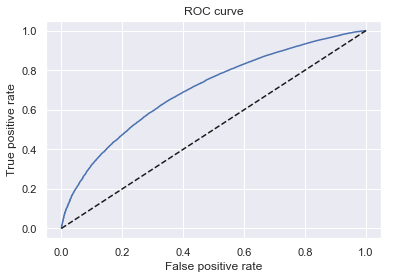

In [184]:
plt.plot(fpr, tpr) # this plot the ROC curve with fpr on x-axis and tpr:y axis
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [185]:
# We need to Analyze the ROC Curve with some Benchmarks 
# so we can know if our model is good.

# We compare the straight line ( which is the random prediction) and the 
# blue curve (TPR vrs FPR comibination based on cut off.)

# Since the Curve lies above the 45degree random prediction line, it means, it 
# performs better. However, more analysis is needed, ie. AUC

# To understand, it we use AUC.. the area under the ROC curve. It is a good
# measure of how good the ROC is. AUC under the prediction by chance line is 50%






##### Selecting Cut OFFs

we create a dataframe to store data for selectingcut off. 


In [188]:
#check the thresholds:
thresholds 

array([1.99261777, 0.99261777, 0.9906507 , ..., 0.40919151, 0.38715237,
       0.38486955])

In [189]:
thresholds.shape

(17362,)

In [190]:
# We concatenate 3 dataframes along the columns.

df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)],axis=1)

In [191]:
df_cutoffs.head()

,0,0,0
0,1.992618,0.000000,0.000000
1,0.992618,0.000000,0.000012
2,0.990651,0.000000,0.000132
3,0.990614,0.000098,0.000132
4,0.989682,0.000098,0.000482


In [192]:
#name the dataframe
df_cutoffs.columns=['thresholds', 'fpr', 'tpr']

In [193]:
df_cutoffs.head() #threshold will be from des ord (large to small)

,thresholds,fpr,tpr
0,1.992618,0.000000,0.000000
1,0.992618,0.000000,0.000012
2,0.990651,0.000000,0.000132
3,0.990614,0.000098,0.000132
4,0.989682,0.000098,0.000482


firt row is not usefulin setting cut off so we have to drop it orset it to close to 1

In [194]:
df_cutoffs['thresholds'][0]=1-1/np.power(10,16)

In [195]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.992618,0.000000,0.000012
2,0.990651,0.000000,0.000132
3,0.990614,0.000098,0.000132
4,0.989682,0.000098,0.000482


Two ways to set cut off:
    
1. based on te estimated probs to be good
2. trucredit scores since theres one -to - one correspondence

since scores re much interpretable, we opt for it

Recall: our formula to calc PDs based on a 
score can be reversed engineered

From PD to Score we use this formula:
sum_of_coef_from_score = (total_score - min_score)/ (max_score - min_score)*(max_sum_coef - min_sum_coef) + min_sum_coef

Now we use this:

score_from_prob = (ln pro_good/1-prob_good - min_sum_coef)*(max_score - min_score) / (max_sum_coef - min_sum_coef) + min_score

In [196]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

#df_cutoff is same as prob to be good

In [197]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2065.0
1,0.992618,0.000000,0.000012,794.0
2,0.990651,0.000000,0.000132,776.0
3,0.990614,0.000098,0.000132,776.0
4,0.989682,0.000098,0.000482,768.0


on the 1st row we have the max prob and the highest score and its out of
the range (300 -850), so we can replace that we our max score tof 850

In [199]:
df_cutoffs['Score'][0]=max_score

In [200]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992618,0.000000,0.000012,794.0
2,0.990651,0.000000,0.000132,776.0
3,0.990614,0.000098,0.000132,776.0
4,0.989682,0.000098,0.000482,768.0


In [201]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17357,0.485272,0.999607,0.999976,411.0
17358,0.439574,0.999902,0.999976,397.0
17359,0.409192,0.999902,0.999988,387.0
17360,0.387152,1.000000,0.999988,380.0
17361,0.384870,1.000000,1.000000,380.0


checking the approval n rejection rate for each cut off:
    
we use two option:
        
1. number of approved loans + number of rejected loans = Total applicants

2. Approval Rate = Number of Approved / Total Applicants

3. Rejection Rate = Number of Rejected / Total Applicants

4. Rejection Rate = 1- Approval Rate

In [203]:
#bwe need to know number of applicant throgh the test data set
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
    

In [205]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()
# borrowers where prediction is >p, which is 1, or 0

In [206]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# cacl the number of approoved applicant for each threshoold 
#Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.


In [207]:
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
##Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.


In [208]:
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equals the ratio of the approved applications  divided  by all applications.


In [209]:
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [210]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992618,0.000000,0.000012,794.0,1,93256,0.000011,0.999989
2,0.990651,0.000000,0.000132,776.0,11,93246,0.000118,0.999882
3,0.990614,0.000098,0.000132,776.0,12,93245,0.000129,0.999871
4,0.989682,0.000098,0.000482,768.0,41,93216,0.000440,0.999560


In [211]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17357,0.485272,0.999607,0.999976,411.0,93251,6,0.999936,0.000064
17358,0.439574,0.999902,0.999976,397.0,93254,3,0.999968,0.000032
17359,0.409192,0.999902,0.999988,387.0,93255,2,0.999979,0.000021
17360,0.387152,1.000000,0.999988,380.0,93256,1,0.999989,0.000011
17361,0.384870,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


In [212]:
## Assume highest PD we accet is 10% i.e.
df_cutoffs.iloc[5000: 6200,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903754,0.257507,0.546523,589.0,48022,45235,0.514943,0.485057
5001,0.903754,0.257605,0.546523,589.0,48023,45234,0.514953,0.485047
5002,0.903754,0.257605,0.546535,589.0,48024,45233,0.514964,0.485036
5003,0.903753,0.257704,0.546535,589.0,48025,45232,0.514975,0.485025
5004,0.903739,0.257704,0.546715,589.0,48040,45217,0.515136,0.484864
5005,0.903738,0.257802,0.546715,589.0,48041,45216,0.515146,0.484854
5006,0.903731,0.257802,0.546763,589.0,48045,45212,0.515189,0.484811
5007,0.903728,0.257900,0.546763,589.0,48046,45211,0.515200,0.484800
5008,0.903716,0.257900,0.546824,589.0,48051,45206,0.515254,0.484746
5009,0.903715,0.257900,0.546848,589.0,48053,45204,0.515275,0.484725


In [213]:
## Assume highest PD we accet is 5% i.e.
df_cutoffs.iloc[1000: 2000,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953519,0.048970,0.204702,649.0,17503,75754,0.187686,0.812314
1001,0.953516,0.048970,0.204726,649.0,17505,75752,0.187707,0.812293
1002,0.953516,0.049068,0.204726,649.0,17506,75751,0.187718,0.812282
1003,0.953502,0.049068,0.204786,649.0,17511,75746,0.187771,0.812229
1004,0.953502,0.049166,0.204786,649.0,17512,75745,0.187782,0.812218
1005,0.953478,0.049166,0.204907,649.0,17522,75735,0.187889,0.812111
1006,0.953477,0.049166,0.204931,649.0,17524,75733,0.187911,0.812089
1007,0.953467,0.049166,0.205003,649.0,17530,75727,0.187975,0.812025
1008,0.953461,0.049264,0.205003,649.0,17531,75726,0.187986,0.812014
1009,0.953341,0.049264,0.205930,649.0,17608,75649,0.188812,0.811188


In [216]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [215]:
df_scorecard.to_csv('df_scorecard.csv')